Epoch 0, Loss: 0.6930
Epoch 100, Loss: 0.5968
Epoch 200, Loss: 0.5397
Epoch 300, Loss: 0.5063
Epoch 400, Loss: 0.4851
Epoch 500, Loss: 0.4709
Epoch 600, Loss: 0.4608
Epoch 700, Loss: 0.4535
Epoch 800, Loss: 0.4481
Epoch 900, Loss: 0.4439

Accuracy on test set: 0.7303


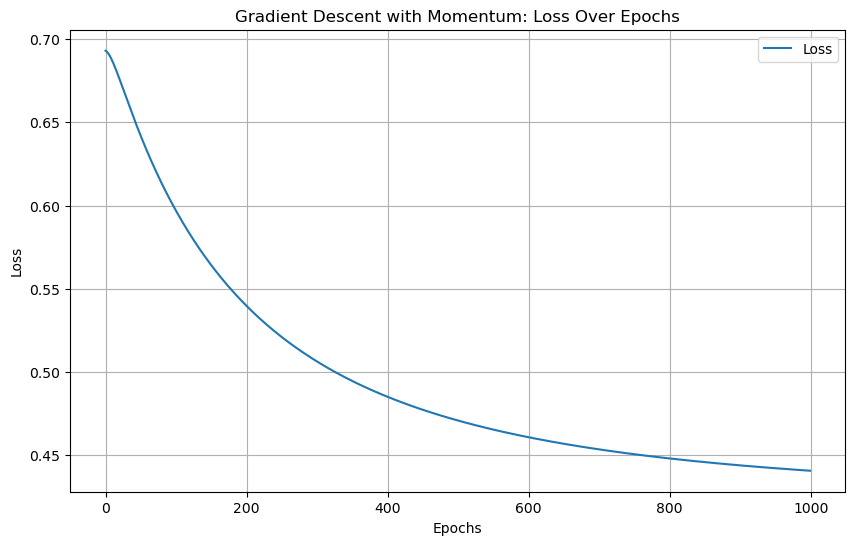

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Gradient Descent and Momentum
class LogisticRegressionMomentum:
    def __init__(self, learning_rate=0.01, epochs=1000, beta=0.9):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - beta: The momentum coefficient.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = beta
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent with Momentum.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and velocity
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        v_w = np.zeros(X.shape[1])  # Velocity for weights
        v_b = 0  # Velocity for bias
        
        # Gradient Descent with Momentum loop
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Update velocities using momentum
            v_w = self.beta * v_w + (1 - self.beta) * dw
            v_b = self.beta * v_b + (1 - self.beta) * db
            
            # Step 4: Update weights and bias using the velocities
            self.weights -= self.learning_rate * v_w
            self.bias -= self.learning_rate * v_b
            
            # Step 5: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Momentum and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionMomentum(learning_rate=0.01, epochs=1000, beta=0.9)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Gradient Descent with Momentum: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


#  Logistic Regression with Nesterov Accelerated Gradient Descent:

Epoch 0, Loss: 0.6930
Epoch 100, Loss: 0.6124
Epoch 200, Loss: 0.5582
Epoch 300, Loss: 0.5230
Epoch 400, Loss: 0.4992
Epoch 500, Loss: 0.4825
Epoch 600, Loss: 0.4704
Epoch 700, Loss: 0.4614
Epoch 800, Loss: 0.4547
Epoch 900, Loss: 0.4494

Accuracy on test set: 0.7303


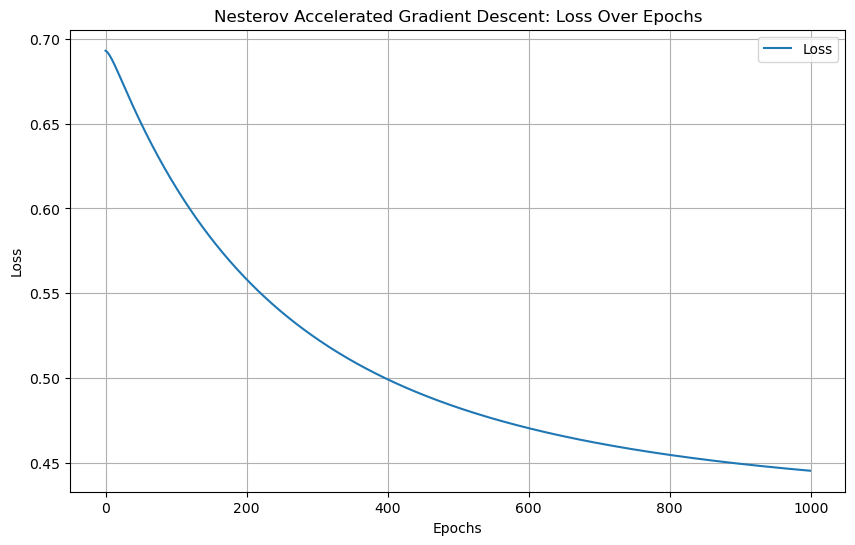

In [2]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Nesterov Accelerated Gradient Descent
class LogisticRegressionNAG:
    def __init__(self, learning_rate=0.01, epochs=1000, beta=0.9):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - beta: The momentum coefficient.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = beta
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Nesterov Accelerated Gradient Descent.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and velocity
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        v_w = np.zeros(X.shape[1])  # Velocity for weights
        v_b = 0  # Velocity for bias
        
        # Nesterov Accelerated Gradient Descent loop
        for epoch in range(self.epochs):
            # Step 1: Look ahead and compute the gradient
            weights_lookahead = self.weights - self.beta * v_w
            bias_lookahead = self.bias - self.beta * v_b
            
            z = np.dot(X, weights_lookahead) + bias_lookahead
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Update velocities using momentum
            v_w = self.beta * v_w + (1 - self.beta) * dw
            v_b = self.beta * v_b + (1 - self.beta) * db
            
            # Step 4: Update weights and bias using the velocities
            self.weights -= self.learning_rate * v_w
            self.bias -= self.learning_rate * v_b
            
            # Step 5: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Nesterov Accelerated Gradient Descent and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionNAG(learning_rate=0.01, epochs=1000, beta=0.9)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Nesterov Accelerated Gradient Descent: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# gd mgd ngd plots for mommentum

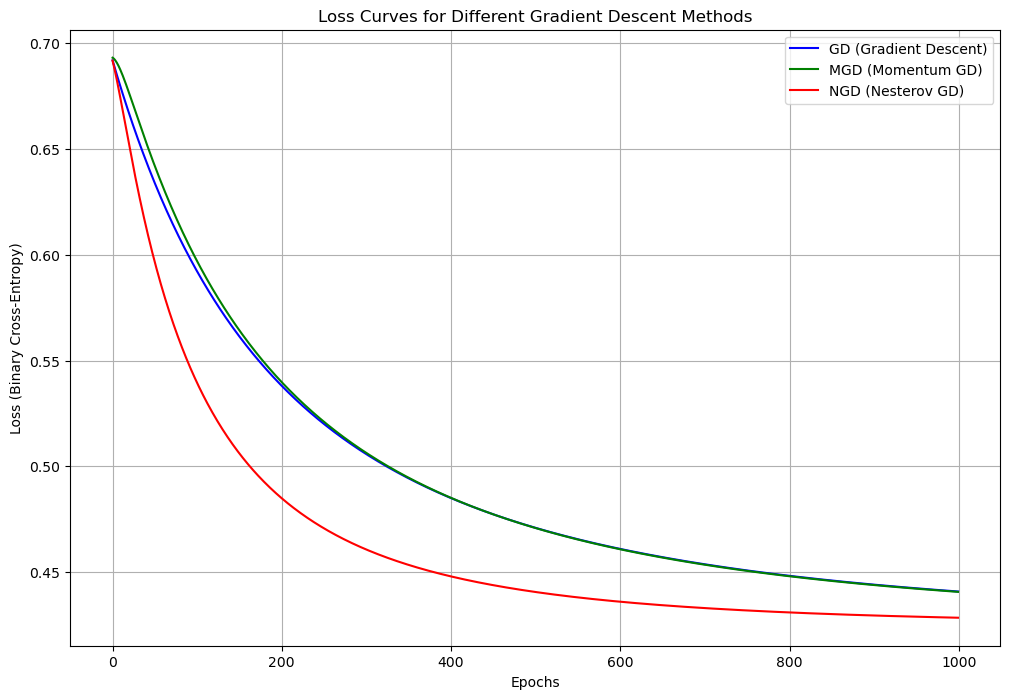

In [3]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement the three types of Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000, beta=0.9, method='gd'):
        """
        Initialize the Logistic Regression model with different optimization methods.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - beta: The momentum coefficient for momentum-based methods.
        - method: 'gd', 'mgd', or 'ngd' for different gradient descent methods.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = beta
        self.method = method
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using different Gradient Descent methods.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and velocity (for MGD and NGD)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        v_w = np.zeros(X.shape[1])  # Velocity for weights (momentum term)
        v_b = 0  # Velocity for bias
        
        # Gradient Descent loop
        for epoch in range(self.epochs):
            # Calculate predictions and gradients
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)
            db = np.sum(error) / len(y)
            
            if self.method == 'gd':
                # Standard Gradient Descent update
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            elif self.method == 'mgd':
                # Momentum Gradient Descent update
                v_w = self.beta * v_w + (1 - self.beta) * dw
                v_b = self.beta * v_b + (1 - self.beta) * db
                self.weights -= self.learning_rate * v_w
                self.bias -= self.learning_rate * v_b
            
            elif self.method == 'ngd':
                # Nesterov Gradient Descent update
                v_w = self.beta * v_w + (1 - self.beta) * dw
                v_b = self.beta * v_b + (1 - self.beta) * db
                # Look ahead step before update
                self.weights -= self.learning_rate * (dw + v_w)
                self.bias -= self.learning_rate * (db + v_b)
            
            # Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
        
    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the models and plot the loss curves
def plot_loss_curves():
    """
    Train and evaluate different gradient descent methods and plot the loss curves.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the models for each method
    gd_model = LogisticRegressionGD(learning_rate=0.01, epochs=1000, method='gd')
    mgd_model = LogisticRegressionGD(learning_rate=0.01, epochs=1000, beta=0.9, method='mgd')
    ngd_model = LogisticRegressionGD(learning_rate=0.01, epochs=1000, beta=0.9, method='ngd')
    
    # Train the models
    gd_model.fit(X_train, y_train)
    mgd_model.fit(X_train, y_train)
    ngd_model.fit(X_train, y_train)
    
    # Plot the loss curves
    plt.figure(figsize=(12, 8))
    plt.plot(gd_model.losses, label='GD (Gradient Descent)', color='blue')
    plt.plot(mgd_model.losses, label='MGD (Momentum GD)', color='green')
    plt.plot(ngd_model.losses, label='NGD (Nesterov GD)', color='red')
    plt.title("Loss Curves for Different Gradient Descent Methods")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (Binary Cross-Entropy)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Run the plotting function
plot_loss_curves()


 # himmelblau function

Epoch 0, Loss: 526.3738, x: 4.5740, y: 4.5020
Epoch 100, Loss: 0.0195, x: -3.7909, y: -3.2703
Epoch 200, Loss: 0.0000, x: -3.7794, y: -3.2832
Epoch 300, Loss: 0.0000, x: -3.7793, y: -3.2832
Epoch 400, Loss: 0.0000, x: -3.7793, y: -3.2832
Epoch 500, Loss: 0.0000, x: -3.7793, y: -3.2832
Epoch 600, Loss: 0.0000, x: -3.7793, y: -3.2832
Epoch 700, Loss: 0.0000, x: -3.7793, y: -3.2832
Epoch 800, Loss: 0.0000, x: -3.7793, y: -3.2832
Epoch 900, Loss: 0.0000, x: -3.7793, y: -3.2832


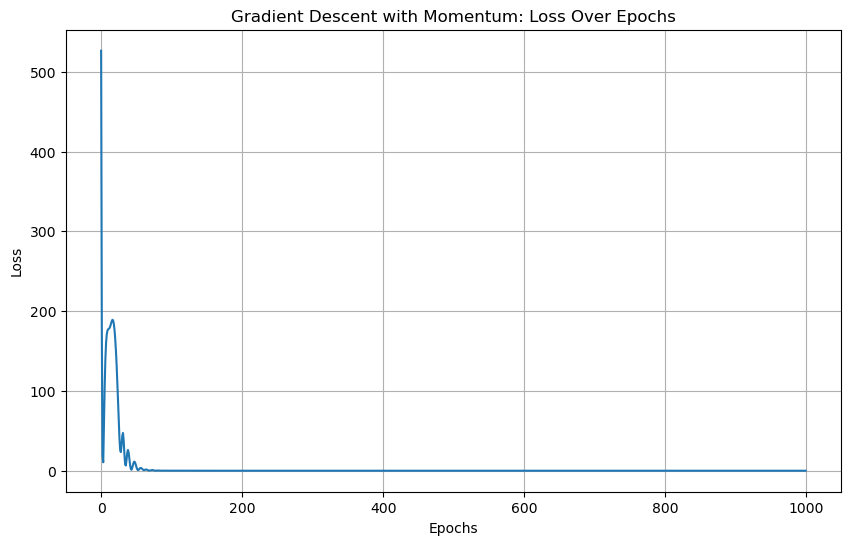

Optimized values: x = -3.7793, y = -3.2832


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Himmelblau function
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Define the gradient of the Himmelblau function with respect to x and y
def gradient_himmelblau(x, y):
    df_dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([df_dx, df_dy])

# Gradient Descent with Momentum
def gradient_descent_momentum(learning_rate, beta, epochs, initial_point):
    x, y = initial_point
    v = np.zeros(2)  # Velocity (momentum)
    
    # Store the loss for plotting
    losses = []
    
    for epoch in range(epochs):
        # Calculate gradient
        gradient = gradient_himmelblau(x, y)
        
        # Update velocity (momentum)
        v = beta * v + (1 - beta) * gradient
        
        # Update parameters (x, y)
        x, y = np.array([x, y]) - learning_rate * v
        
        # Compute the loss at the new point
        loss = himmelblau(x, y)
        losses.append(loss)
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}, x: {x:.4f}, y: {y:.4f}")
    
    return x, y, losses

# Parameters
learning_rate = 0.01
beta = 0.9
epochs = 1000
initial_point = np.array([5.0, 5.0])  # Initial guess

# Run Gradient Descent with Momentum
final_x, final_y, losses = gradient_descent_momentum(learning_rate, beta, epochs, initial_point)

# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title("Gradient Descent with Momentum: Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

print(f"Optimized values: x = {final_x:.4f}, y = {final_y:.4f}")


# rosenbrock ngd  mgd plots

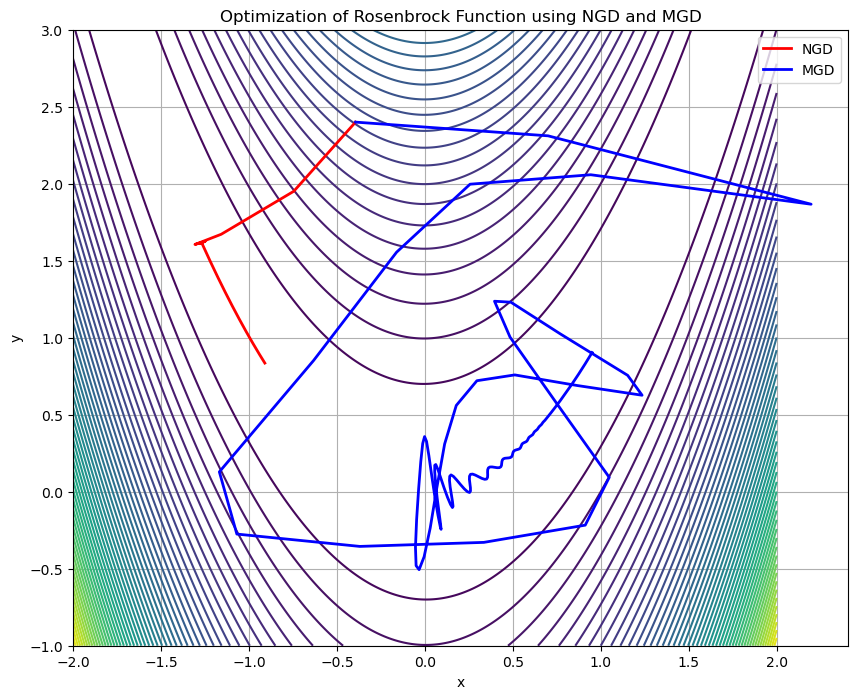

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function and its gradient
def rosenbrock(x, y, a=1, b=100):
    """Rosenbrock's function"""
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(x, y, a=1, b=100):
    """Gradient of the Rosenbrock function"""
    dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dy = 2 * b * (y - x**2)
    return np.array([dx, dy])

# Define the natural gradient descent (NGD) function
def ngd_optimizer(learning_rate=0.001, epochs=500, a=1, b=100):
    """Natural Gradient Descent for Rosenbrock function"""
    x, y = -2, 2  # Starting point
    
    trajectory = []  # To store the trajectory of the optimization
    for epoch in range(epochs):
        gradient = rosenbrock_grad(x, y, a, b)
        
        # Natural Gradient Descent (in this case, the natural gradient is just the gradient)
        x_new, y_new = np.array([x, y]) - learning_rate * gradient
        
        trajectory.append([x_new, y_new])
        x, y = x_new, y_new
    
    return np.array(trajectory)

# Define the momentum gradient descent (MGD) function
def mgd_optimizer(learning_rate=0.001, momentum=0.9, epochs=500, a=1, b=100):
    """Momentum Gradient Descent for Rosenbrock function"""
    x, y = -2, 2  # Starting point
    v = np.array([0, 0])  # Initial momentum vector
    
    trajectory = []  # To store the trajectory of the optimization
    for epoch in range(epochs):
        gradient = rosenbrock_grad(x, y, a, b)
        
        # Momentum Gradient Descent update rule
        v = momentum * v + learning_rate * gradient
        x_new, y_new = np.array([x, y]) - v
        
        trajectory.append([x_new, y_new])
        x, y = x_new, y_new
    
    return np.array(trajectory)

# Plotting the results
def plot_contour_and_trajectories():
    """Plot the Rosenbrock function contour and trajectories of NGD and MGD."""
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock(X, Y)
    
    # Create the contour plot
    plt.figure(figsize=(10, 8))
    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    
    # Natural Gradient Descent trajectory
    ngd_trajectory = ngd_optimizer()
    plt.plot(ngd_trajectory[:, 0], ngd_trajectory[:, 1], label='NGD', color='red', lw=2)
    
    # Momentum Gradient Descent trajectory
    mgd_trajectory = mgd_optimizer()
    plt.plot(mgd_trajectory[:, 0], mgd_trajectory[:, 1], label='MGD', color='blue', lw=2)
    
    # Plot settings
    plt.title("Optimization of Rosenbrock Function using NGD and MGD")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot the results
plot_contour_and_trajectories()
